# Measurements
* segmentation
* extraction

In [1]:
import imageio #To read dcm images
import matplotlib.pyplot as plt #Used to plot images/graphs
import numpy as np #helpful arithmetics functions
import scipy.ndimage as ndi 

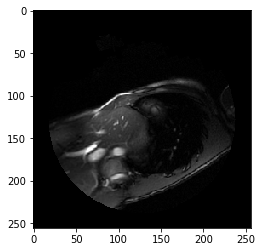

In [2]:
im = imageio.imread('SCD2001_MR_220.dcm')
plt.imshow(im, cmap='gray')
plt.show()

Number of labels:  55


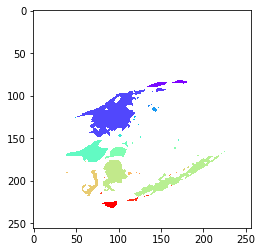

In [6]:
#Segmentation (labeling organ parts)

#preprocessing
im_filtered = ndi.median_filter(im, size=3)
masks_start = np.where(im>60,1,0) #later: change the '60'
mask = ndi.binary_closing(masks_start)

#labeling
labels,nlabels = ndi.label(mask)
print('Number of labels: ', nlabels)

#overlay
overlay = np.where(labels,labels,np.nan) #background stuff is deleted
plt.imshow(overlay, cmap='rainbow')
plt.show()

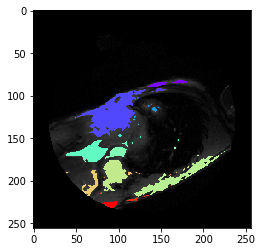

In [7]:
#overlay
overlay = np.where(labels,labels,np.nan)
plt.imshow(im, cmap='gray') #plot original picture
plt.imshow(overlay, cmap='rainbow')
plt.show()

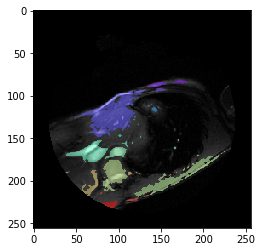

In [8]:
#overlay
overlay = np.where(labels,labels,np.nan)
plt.imshow(im, cmap='gray') #plot original picture
plt.imshow(overlay, cmap='rainbow', alpha =.5) #alpha number is the transparency of the image
plt.show()

In [9]:
#Extraction
#pick one part (point of interest)
poi_val = labels[125, 100] #picking a location
print('This label: ', poi_val)
poi = np.where(labels==poi_val,1,0)

This label:  6


In [10]:
#Bounding box...makes an imaginaryy box around the point of interest
bboxes = ndi.find_objects(poi)
print("number of objects: ", len(bboxes))

number of objects:  1


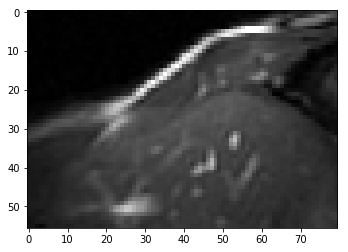

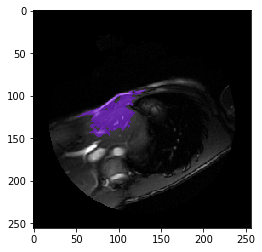

In [13]:
#zoom into point of interest
im_poi = im[bboxes[0]]
plt.imshow(im_poi, cmap = 'gray')
plt.show()
#overlay
overlay = np.where(labels== poi_val,labels,np.nan)
plt.imshow(im, cmap='gray') #plot original picture
plt.imshow(overlay, cmap='rainbow', alpha =.5) #alpha number is the transparency of the image
plt.show()

In [14]:
#Variance

#Variance for all pixels
var_all = ndi.variance(im)
print('All pixels: ', var_all)

# Variance forlabeled regions
var_labels = ndi.variance(labels)
print('labeled regions: ', var_labels)

All pixels:  720.0675272634253
labeled regions:  44.26614332734607


In [15]:
#Variance of point of interest
var_poi = ndi.variance(im, labels, index=poi_val)
print('Point of interest: ', var_poi)

Point of interest:  1257.7408073909808


In [16]:
#Histograms
hist_all = ndi.histogram(im,10,109,100)
hist_labels = ndi.histogram(im, 10, 109,100, labels = labels)
hist_poi = ndi.histogram(im, 10,109,100, labels = labels, index = poi_val)

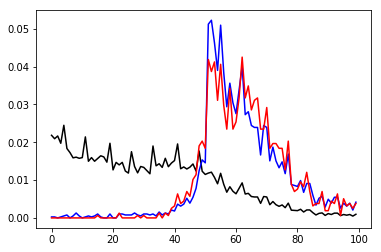

In [19]:
#Density of histograms
plt.plot(hist_all/hist_all.sum(), color = 'black')
#labeled areas
plt.plot(hist_labels/hist_labels.sum(), color = 'blue')
#point of interest
plt.plot(hist_poi/hist_poi.sum(), color = 'red')
plt.show()

In [21]:
#Distance
#Eucelidean Distance
poi_mask = np.where(labels == poi_val,1,0)
dists = ndi.distance_transform_edt(poi_mask)
print('Max distance (mm): ', ndi.maximum(dists))
print('Max location: ', ndi.maximum_position(dists))

Max distance (mm):  14.035668847618199
Max location:  (124, 99)


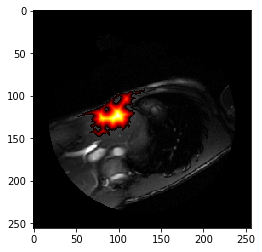

In [23]:
#Overlay
overlay = np.where(dists>0,dists,np.nan)
plt.imshow(im, cmap='gray') #plot original picture
plt.imshow(overlay, cmap='hot') 
plt.show()